<a href="https://colab.research.google.com/github/h-neal/Matt-Macarty-Algorithmic-Trading-Youtube-Series/blob/main/7_Linear_Regression_Model_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Simple Regression Techniques in Python**

In [4]:
!pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.59
    Uninstalling yfinance-0.2.59:
      Successfully uninstalled yfinance-0.2.59


In [5]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import datetime as dt

import yfinance as yf

**Get data for SPY and GOOG**

In [6]:
stocks = "GOOG SPY".split()
start = dt.date.today() - dt.timedelta(365)

In [17]:
data = yf.download(stocks, start)['Close']
data.head()

[*********************100%***********************]  2 of 2 completed


Ticker,GOOG,SPY
Date,,
2024-05-14,171.119507,516.723328
2024-05-15,173.060303,523.121948
2024-05-16,174.602982,522.045654
2024-05-17,176.454208,522.796021
2024-05-20,177.618729,523.398438


In [18]:
returns = np.log(data).diff()
returns.head()

Ticker,GOOG,SPY
Date,,
2024-05-14,NaN,NaN
2024-05-15,0.011278,0.012307
2024-05-16,0.008875,-0.002060
2024-05-17,0.010547,0.001436
2024-05-20,0.006578,0.001152


In [19]:
sample = returns.sample(60).corr()
sample

Ticker,GOOG,SPY
Ticker,,
GOOG,1.000000,0.808673
SPY,0.808673,1.000000


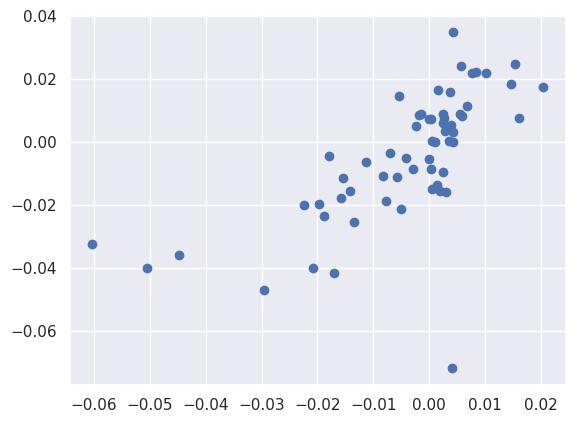

In [20]:
sample = returns.sample(60)
plt.scatter(x=sample['SPY'], y=sample['GOOG']);

In [21]:
reg = np.polyfit(sample['SPY'], sample['GOOG'], deg = 1)
reg

array([ 9.12489420e-01, -7.95489835e-04])

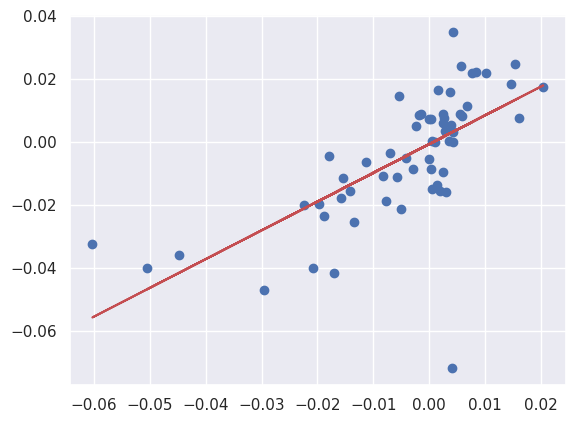

In [22]:
trend = np.polyval(reg, sample['SPY'])
plt.scatter(x=sample['SPY'], y=sample['GOOG']);
plt.plot(sample['SPY'], trend, 'r');

**Regression as a Technical Indicator**

In [33]:
data = yf.download("SPY", start)['Close']
data = pd.DataFrame(data)
time = np.arange(1, len(data) + 1)
data['time'] = time
data = data[['time', 'SPY']]
data = round(data, 2)
data.tail()

[*********************100%***********************]  1 of 1 completed


Ticker,time,SPY
Date,,
2025-05-08,247,565.06
2025-05-09,248,564.34
2025-05-12,249,582.99
2025-05-13,250,586.84
2025-05-14,251,587.59


In [34]:
reg = np.polyfit(data['time'], data['SPY'], deg = 1)
reg

array([1.72699958e-01, 5.42315662e+02])

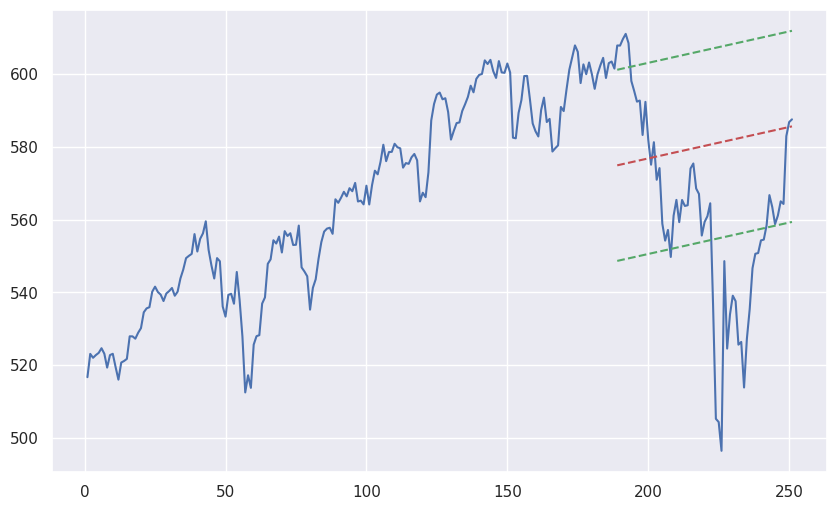

In [42]:
trend = np.polyval(reg, data['time'][-63:])
std = data['SPY'][-63:].std()
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['SPY'], label="S&P500")
plt.plot(data['time'][-63:], trend, 'r--')
plt.plot(data['time'][-63:], trend - std, 'g--')
plt.plot(data['time'][-63:], trend + std, 'g--')

In [44]:
predict = np.poly1d(reg)
predict(300)

np.float64(594.1256493113265)

**Simple Scatter Plot with Trend Line**

<Axes: xlabel='time', ylabel='SPY'>

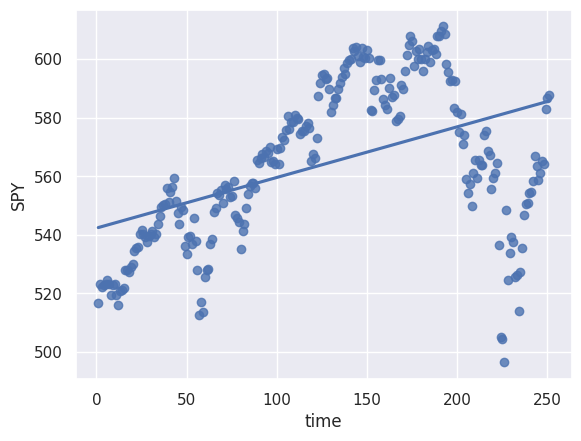

In [46]:
sb.regplot(x=data['time'], y=data['SPY'], ci=None, fit_reg=True, data=data[-63:])